# Details of Dataset
The dataset comes in two pieces: objective information (app statistics like size, # of installs, price, category, # of reviews, type, content rating, genres, last updated, current version, and minimum required Android version, and the aggregated number of stars) and user reviews (the review itself, positive/negative/neutral sentiment, sentiment polarity, and sentiment subjectivity). I suspected that the objective information would contribute much more to the overarching goals of the project.

# Problem Statement
The Internet is a true gold mine of data. E-commerce and review sites are brimming with a lot of untapped data with a prominent potential to convert into meaningful insights that can help with robust decision making. Here, I have explored using data science and machine learning techniques on data retrieved from one such avenue on the internet, the Google Play Store. I have predicted rating of an app. Used following pipeline to accomplish this task.

1.Data Wrangling and Preprocessing
2.Exploratory Data Analysis
3.Feature Selection
4.Model Training
5.Testing and Optimization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

In [3]:
data=pd.read_csv("C:\\Users\\LENOVO\\Desktop\\googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
data.shape

(10841, 13)

In [5]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
data.describe

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite â€“ FREE Live Cool Themes, Hid...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [7]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Data Wrangling and Preprocessing
The vast majority of this project was about cleaning up and preprocessing the data. Since all of the data was scraped directly from the Google Play Store, there were a lot of errors in transcription (NaN values representing nothing scraped, shifted data columns, etc.) and categorical values to translate or encode. The steps involved in Preprocessing are as follows:

Look for Null or Missing Values
Change data type of features, if required
Encode data of categorical features
Deal with Null or Missing values

In [8]:
data = data.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

In [9]:
data.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [10]:
data[data['Rating'] > 5]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [11]:
data['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [12]:
rec = data[data['Category'] == '1.9'].index
data = data.drop(rec)

# Encoding Techniques
The Installs, Rating, Price, and Size, Category, Genre features had to be processed so they could be read as numbers as they were originally all objects. Each feature had their unique problems that had to be fixed. There are two techniques:

One hot encoding: It takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.
Label Encoding: It refers to converting the labels into numeric form so as to convert it into the machine-readable form.
For the Installs, the commas and had '+'s appended to the ends were removed . Price needed the '$' removed and converted into float. Here we have performed label encoding for rest of the features of object type.

In [13]:
train_data = data.copy()

In [14]:
# Cleaning "Price" column
train_data['Price'] = train_data['Price'].apply(lambda x : x.strip('$'))
# Cleaning "Installs" column
train_data['Installs'] = train_data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [15]:
# Convert all these to float
train_data['Price'] = train_data['Price'].astype(float)
train_data['Installs'] = train_data['Installs'].astype(float)
train_data['Reviews'] = train_data['Reviews'].astype(float)

In [16]:
# Remove record with Type nan
rec = train_data[train_data['Type'].isnull()].index
train_data = train_data.drop(rec)

In [17]:
# Get all features with type 'object'
col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [18]:
# Encode features except Size
for c in col_list:
    if c != 'Size':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [19]:
# Compare actual and encoded labels for column 'Type'
print(data['Type'].unique().tolist())
print(train_data['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [20]:
# Replace "Varies with device" in Size with null value
train_data.loc[train_data['Size'] == 'Varies with device', 'Size'] = np.nan

In [21]:
# Removing the suffixes (k and M) and representing all the data as bytes 
# (i.e)for k, value is multiplied by 1000 and for M, the value is multiplied by 1000000 
train_data.Size = (train_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [22]:
# Now check null values
train_data.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [23]:
# For Size missing values
# Get rows which are not null for Size
X = train_data[train_data['Size'].notnull()]
y = train_data.loc[train_data['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get all rows with null values
X_miss = train_data[train_data['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size', 'Rating'])

# Fill the predicted values
train_data.loc[train_data['Size'].isnull(), 'Size'] = model.predict(X_miss)

In [24]:
# For Rating missing values
X = train_data[train_data['Rating'].notnull()]
y = train_data.loc[train_data['Rating'].notnull(), 'Rating']
X = X.drop(columns=['Rating'])

# Fit model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get all rows with null values
X_miss = train_data[train_data['Rating'].isnull()]
X_miss = X_miss.drop(columns = ['Rating'])

# Fill the predicted values
train_data.loc[train_data['Rating'].isnull(), 'Rating'] = model.predict(X_miss)

In [25]:
train_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [26]:
# Final data type of the data
train_data.dtypes

Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [27]:
#Analyse the preprocessed data
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,9
1,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,12
2,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,9
3,0,4.5,215644.0,25000000.0,50000000.0,0,0.0,4,9
4,0,4.3,967.0,2800000.0,100000.0,0,0.0,1,11


# Data Analysis and Visualizations
Performing a detailed analysis of the data helps understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. I used different plots.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

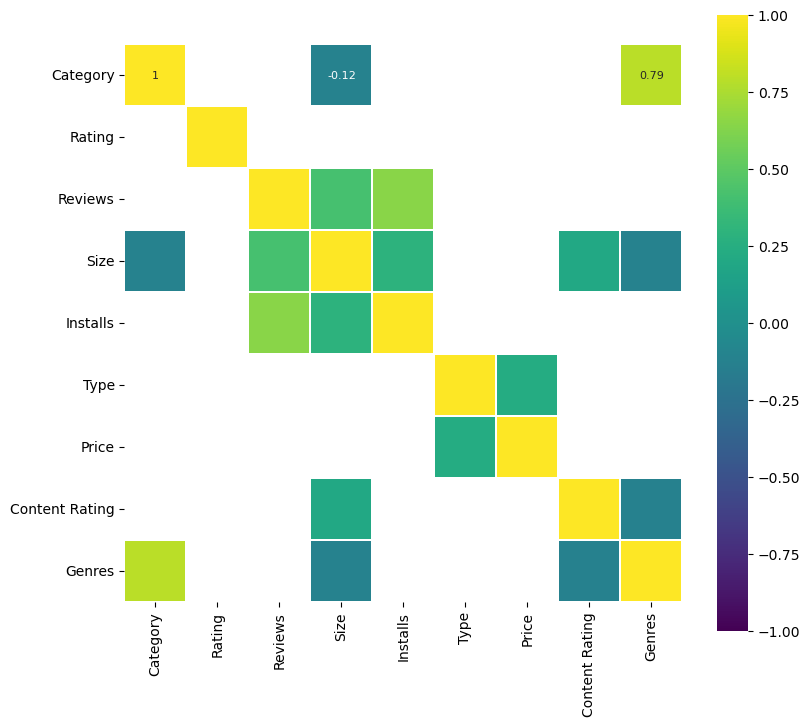

In [28]:
# Correlation heatmap
corr = train_data.corr() 
plt.figure(figsize=(9, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Text(0.5, 1.0, 'Distribution of Rating')

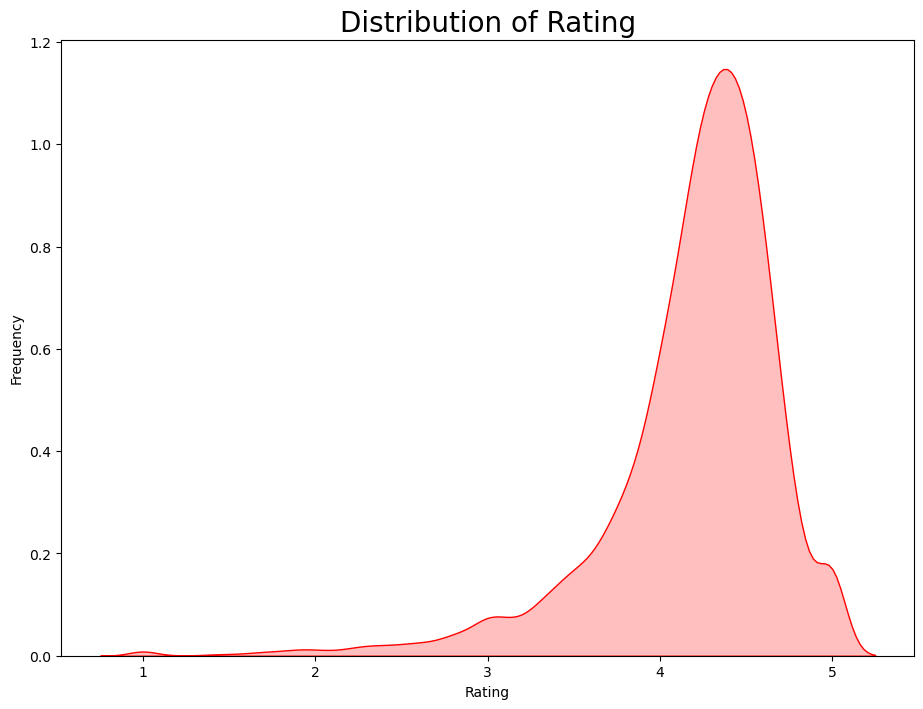

In [29]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# rating distibution 
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0.5, 1.0, 'Count of app in each category')

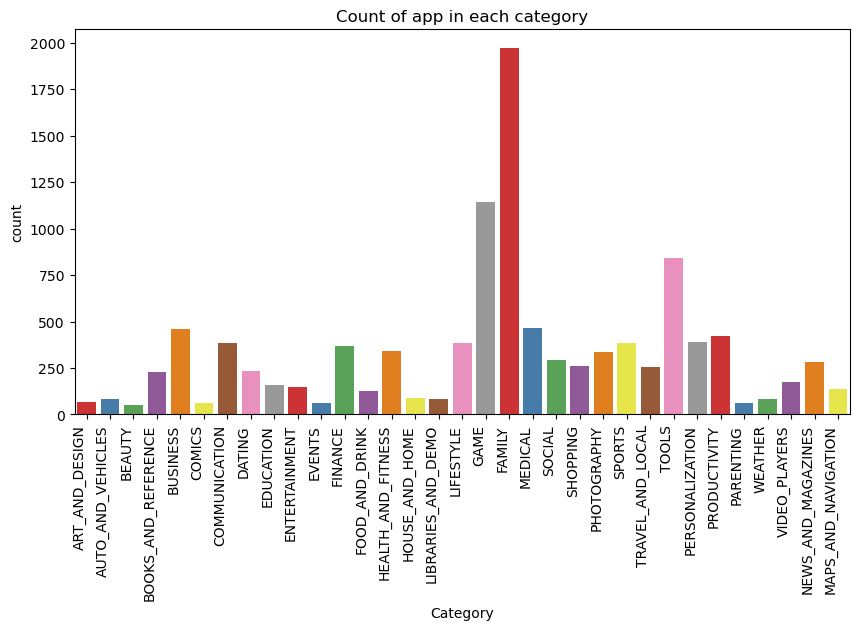

In [30]:
#Game and Family category are the most appearances for application in store
plt.figure(figsize=(10, 5))
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category')

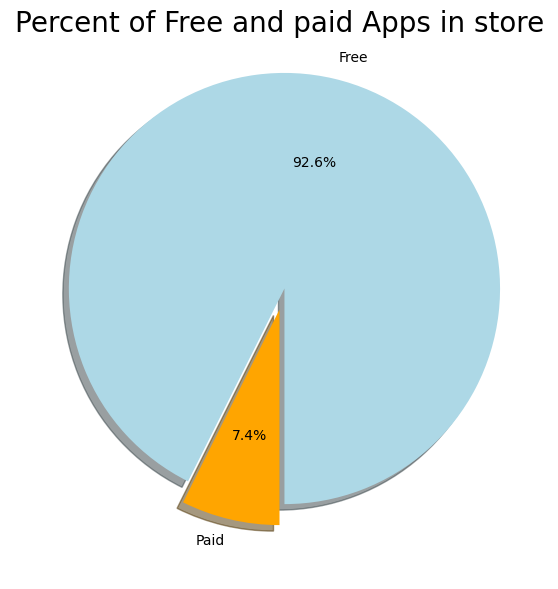

In [31]:
# about 93% of the apps are free on google playstore
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["lightblue","orange"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free and paid Apps in store',size = 20)
plt.show()

# Model Training
This is a Regression problem since I am predicting Apps rating which is a continous random variable. The steps involved are as follows:

Standardize or Normalize Training Data
Train Test Split
Train Model
Evaluate Important Features

# Standarize Data
In order to standarize, only those columns should be selected which are not categorical in nature. Standarization works best for features having large values. Here I have used StandardScaler() method of python. The idea behind StandardScaler is that it will transform data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [32]:
# Standardize data
# Columns not to be standardized. These are columns with categorical data, 
# also we don't standardize our target vraiable
cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Rating']

# Pick remaining columns and standardize them 
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

# Check data after standarization
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,-0.151664,-0.140860,-0.181770,0,-0.064419,1,9
1,0,3.9,-0.151388,-0.366005,-0.176007,0,-0.064419,1,12
2,0,4.7,-0.121828,-0.604659,-0.123084,0,-0.064419,1,9
3,0,4.5,-0.078063,0.129314,0.406145,0,-0.064419,4,9
4,0,4.3,-0.151388,-0.870330,-0.180712,0,-0.064419,1,11


# Train Test Split
I have used train_test_split to split my data into training and validation set. I have used 80% of the data for training purpose and 20% of the data for validation.

In [33]:
# Train Test Split
# Split data to 80% of the training and 20% for the validation
y = train_data['Rating']
X = train_data.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (8671, 8)
Validation Set Dimensions: (2168, 8)


# Random Forest Regressor
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. Here we have used it for regression problem.

In [34]:
# Train Random Forest Regressor
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.0277705028763053
Mean squared Error for Test Set: 0.19730315128299208


feature: Category = 0.09466571287106852
feature: Reviews = 0.3459252686182521
feature: Size = 0.29330443139571266
feature: Installs = 0.09660450405682594
feature: Type = 0.005040943020932148
feature: Price = 0.027559390932714648
feature: Content Rating = 0.028535089204177452
feature: Genres = 0.10836465990031664


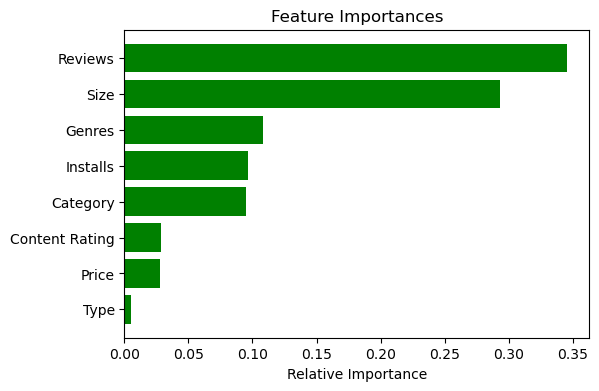

In [35]:
# Important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Bagging Regressor
Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method. An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees (CART). Bagging of the CART algorithm would work as follows.

Create many (e.g. 100) random sub-samples of our dataset with replacement.
Train a CART model on each sample.
Given a new dataset, calculate the average prediction from each model.

In [36]:
# Fit model
br = BaggingRegressor(random_state=300)
                            
br.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, br.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, br.predict(X_test)))

Mean squared Error for Training Set: 0.03810970868434892
Mean squared Error for Test Set: 0.21427086753383834


# KNN Regressor
KNN can be used for both classification and regression problems. The algorithm uses 'feature similarity' to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [37]:
# Fit model
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, knr.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, knr.predict(X_test)))

Mean squared Error for Training Set: 0.16243512289005188
Mean squared Error for Test Set: 0.23906857241625318


# Linear Regression
Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In essence, multiple regression is the extension of ordinary least-squares (OLS) regression that involves more than one explanatory variable.

In [38]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Measure mean squared error` for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, model.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, model.predict(X_test)))

Mean squared Error for Training Set: 0.22748107759930355
Mean squared Error for Test Set: 0.22238020442244774


# Results
Above all techniques, Random Forest Regressor performed best with testing mean squared error of 0.19

Hyper-parameter tuning can be performed on this data and there are a couple of ways to do this but an efficient solution is using Grid-Search-Cross-Validation approach where we have to form a grid of parameters and iteratively apply cross-validation to find the best set of parameters for which model performs the best.